In [ ]:
#Load libraries
import os
import pandas as pd
import numpy as np
from fancyimpute import KNN   
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from random import randrange, uniform

Using TensorFlow backend.


In [2]:
# Set current working directory
os.chdir("C:/Users/Chaitrali/Downloads/Data/data01s2l1/Edwisor-Project/CabfarePred")

In [44]:
#Read the input csv file
rental=pd.read_csv('day.csv', header = 0 ).iloc[:,1:16]

In [5]:
#concert the required variavles to category
convert_dic={'dteday' : 'category','season': 'category','mnth': 'category','yr': 'category','holiday': 'category', 'weekday': 'category', 'workingday': 'category', 'weathersit': 'category'}
rental=rental.astype(convert_dic)

dteday        category
season        category
yr            category
mnth          category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object


In [15]:
# Missing Value Analysis
#Create dataframe with missing percentage
missing_val = pd.DataFrame(train.isnull().sum())

#Reset index
missing_val = missing_val.reset_index()

#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

#Calculate percentage
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/16000*100)

#descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)
# missing_val
#save output results 
# missing_val.to_csv("Miising_perc.csv", inex = False)

# Outlier Analysis

In [6]:
#save it in another name, incase we need it again
df = rental.copy()
rental = df.copy()


{'whiskers': [<matplotlib.lines.Line2D at 0xc0060764a8>,
 'caps': [<matplotlib.lines.Line2D at 0xc006076cf8>,
 'boxes': [<matplotlib.lines.Line2D at 0xc006066ef0>],
 'medians': [<matplotlib.lines.Line2D at 0xc006082588>],
 'fliers': [<matplotlib.lines.Line2D at 0xc0060829b0>],
 'means': []}

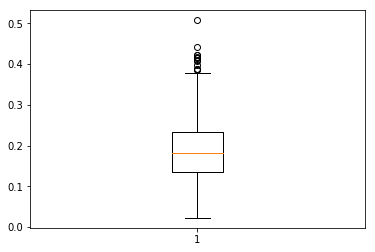

In [7]:
# #Plot boxplot to visualize Outliers
%matplotlib inline  
plt.boxplot(rental['windspeed'])


In [8]:
#save numeric names
coutliers = [ 'hum', 'windspeed']
for list in coutliers:
    #Detect and replace with NA
    # #Extract quartiles
    q75, q25 = np.percentile(rental[list], [75 ,25])

    #Calculate IQR
    iqr = q75 - q25
   
    # #Calculate inner and outer fence
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)

    # #Replace with NA
    rental.loc[rental[list] < minimum,list] = np.nan
    rental.loc[rental[list] > maximum,list] = np.nan

    # #Calculate missing value
    missing_val = pd.DataFrame(rental.isnull().sum())
    missing_val

In [10]:
#Impute with mean
rental['windspeed'] = rental['windspeed'].fillna(rental['windspeed'].mean())

In [11]:
#Impute with mean
rental['hum'] = rental['hum'].fillna(rental['hum'].mean())

## Feature Selection 

In [52]:
##Correlation analysis
#Correlation plot
numeric=['temp', 'atemp', 'hum', 'windspeed' ,'casual','registered', 'cnt']
df_corr = rental.loc[:,numeric]


                temp     atemp       hum  windspeed    casual  registered  \
temp        1.000000  0.991702  0.123703  -0.140000  0.543285    0.540012   
atemp       0.991702  1.000000  0.137293  -0.165315  0.543864    0.544192   
hum         0.123703  0.137293  1.000000  -0.201894 -0.087800   -0.112238   
windspeed  -0.140000 -0.165315 -0.201894   1.000000 -0.146933   -0.204112   
casual      0.543285  0.543864 -0.087800  -0.146933  1.000000    0.395282   
registered  0.540012  0.544192 -0.112238  -0.204112  0.395282    1.000000   
cnt         0.627494  0.631066 -0.121518  -0.216473  0.672804    0.945517   

                 cnt  
temp        0.627494  
atemp       0.631066  
hum        -0.121518  
windspeed  -0.216473  
casual      0.672804  
registered  0.945517  
cnt         1.000000  


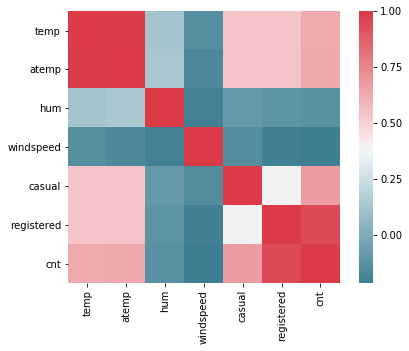

In [53]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = df_corr.corr()
print(corr)
#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [54]:
#Chisquare test of independence
#Save categorical variables
cat_names = ['season', 'mnth','yr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'dteday']

In [57]:
for i in cat_names:
    
    for k in cat_names:
        print(i)
        print(k)
        chi2, p, dof, ex = chi2_contingency(pd.crosstab(rental[k] , rental[i]))
        print(p)

season
season
0.0
season
mnth
0.0
season
yr
0.9999288084245916
season
holiday
0.6831687073042005
season
weekday
0.9999999999988407
season
workingday
0.8865568364019545
season
weathersit
0.02117930104473366
season
dteday
0.47791725528737083
mnth
season
0.0
mnth
mnth
0.0
mnth
yr
0.9999999999999892
mnth
holiday
0.5593083086035064
mnth
weekday
1.0
mnth
workingday
0.9933495217919545
mnth
weathersit
0.014637111771019196
mnth
dteday
0.4633408861792731
yr
season
0.9999288084245916
yr
mnth
0.9999999999999892
yr
yr
4.0118539920135064e-160
yr
holiday
0.9949247279855291
yr
weekday
0.9999995848511959
yr
workingday
0.9799434134248637
yr
weathersit
0.12737941480418666
yr
dteday
0.4826092829158382
holiday
season
0.6831687073042003
holiday
mnth
0.5593083086035064
holiday
yr
0.9949247279855291
holiday
holiday
2.70694538395451e-153
holiday
weekday
8.567055344615637e-11
holiday
workingday
4.033370935452143e-11
holiday
weathersit
0.6008572213448835
holiday
dteday
0.48260928291583943
weekday
season
0.999999

In [14]:
# Drop the variables not needed for analysis
rental_train=rental.drop([ 'dteday','casual', 'registered'], axis=1)

# Model Development

# Decision Tree

In [15]:
#Load libraries
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

C:\Users\Chaitrali\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [115]:
# Divide the data into train and test
# train, test = train_test_split(rental_train, test_size=0.2)
# Already loaded

In [45]:
# Decision tree for regression
fit_DT = DecisionTreeRegressor(max_depth=2).fit(train.iloc[:, 0:11], train.iloc[:,11])

In [17]:
#Apply model on test data
predictions_DT = fit_DT.predict(test.iloc[:,0:11])


In [18]:
#Calculate MAPE
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape

In [46]:
MAPE(test.iloc[:,11], predictions_DT)


29.755859069814615

In [ ]:
#Error 29.75
#Accuracy 70.25

# Random Forest

In [20]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier



C:\Users\Chaitrali\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [21]:
RF_model = RandomForestClassifier(n_estimators = 30).fit(train.iloc[:, 0:11], train.iloc[:,11])



In [22]:
RF_Predictions = RF_model.predict(test.iloc[:, 0:11])

In [23]:
MAPE(test.iloc[:,11], RF_Predictions)

23.14477914606017

In [ ]:
#error is 24.85 for n=30
#accuracy 75.16

# KNN Imputation

In [24]:
#KNN implementation
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier(n_neighbors = 1).fit(train.iloc[: , 0:11], train.iloc[:, 11])



In [25]:
#predict test cases
KNN_Predictions = KNN_model.predict(test.iloc[: , 0:11])


In [26]:
MAPE(test.iloc[:,11], KNN_Predictions)

22.147383244438355

In [ ]:
#error is 22.96 for K-1
#accuracy is 77.06


# Linear Regression


In [55]:
#Load libraries
import os
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split


In [210]:
rental_train.head(0)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt


In [211]:
linear = rental_train.iloc[:, 7:11]


In [213]:
cat_names = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday','weathersit']
for i in cat_names:
    temp = pd.get_dummies(rental_train[i], prefix = i)
    linear = linear.join(temp)

In [214]:
linear= linear.join(rental_train['cnt'])

In [224]:
#already loaded
train1, test1 = train_test_split(linear, test_size=0.2)

In [217]:
#Import libraries for LR
import statsmodels.api as sm

In [228]:
# Train the model using the training sets
model = sm.OLS(train1.iloc[:, 36 ], train1.iloc[:, 0:36 ]).fit()

In [229]:
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     102.3
Date:                Wed, 17 Apr 2019   Prob (F-statistic):          9.88e-199
Time:                        15:47:33   Log-Likelihood:                -4710.2
No. Observations:                 584   AIC:                             9478.
Df Residuals:                     555   BIC:                             9605.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
temp          2711.6209   1498.646      1.809      0.071    -232.090    5655.332
atemp         2048.2741   1553.545      1.318      0.188   -1003.273    5099.821
hum          -1477.9600    357.652     -4.132      0.000   -2180.477    -775.443
windspeed    -2348.7184    515.392     -4.557      0.000   -3361.075   -1336.362
season_1      -479.3525    141.365     -3.391      0.001    -757.028    -201.677
season_2       125.6893    145.334      0.865      0.388    -159.783     411.162
season_3       386.9613    150.098      2.578      0.010      92.132     681.790
season_4      1113.9502    146.239      7.617      0.000     826.701    1401.200
yr_0          -415.7834     82.519     -5.039      0.000    -577.870    -253.697
yr_1          1563.0318     80.648     19.381      0.000    1404.619    1721.444
mnth_1        -338.4498    206.483     -1.639      0.102    -744.033      67.133
mnth_2        -190.4273    193.860     -0.982      0.326    -571.216     190.361
mnth_3         251.5407    151.781      1.657      0.098     -46.596     549.677
mnth_4         402.7009    179.693      2.241      0.025      49.739     755.663
mnth_5         721.3950    195.247      3.695      0.000     337.882    1104.908
mnth_6         459.0443    187.342      2.450      0.015      91.058     827.031
mnth_7        -285.0334    214.989     -1.326      0.185    -707.325     137.258
mnth_8         112.7212    204.445      0.551      0.582    -288.858     514.301
mnth_9         655.8473    161.088      4.071      0.000     339.430     972.264
mnth_10        202.9996    177.103      1.146      0.252    -144.874     550.873
mnth_11       -461.3188    191.960     -2.403      0.017    -838.375     -84.263
mnth_12       -383.7713    166.515     -2.305      0.022    -710.847     -56.696
holiday_0      818.6531    100.126      8.176      0.000     621.981    1015.325
holiday_1      328.5953    114.912      2.860      0.004     102.880     554.311
weekday_0     -128.9968     70.348     -1.834      0.067    -267.177       9.184
weekday_1       60.8670     83.415      0.730      0.466    -102.980     224.714
weekday_2      180.5720     84.509      2.137      0.033      14.576     346.568
weekday_3      234.0469     88.346      2.649      0.008      60.514     407.580
weekday_4      154.6466     85.473      1.809      0.071     -13.244     322.537
weekday_5      290.6338     83.501      3.481      0.001     126.616     454.651
weekday_6      355.4789     69.955      5.082      0.000     218.071     492.887
workingday_0   555.0775     93.412      5.942      0.000     371.594     738.561
workingday_1   592.1709     67.852      8.727      0.000     458.893     725.449
weathersit_1  1284.9095     84.741     15.163      0.000    1118.458    1451.361
weathersit_2   783.2974     85.382      9.174      0.000     615.586     951.009
weath

In [230]:
# make the predictions by the model
predictions_LR = model.predict(test1.iloc[:,0:36]) 


In [232]:
#Calculate MAPE
MAPE(test1.iloc[:,36], predictions_LR)

16.37937936466323

In [ ]:
#MAPE 16.37
#Accuracy 83.63